In [179]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from statsmodels.tsa import stattools



COLUMNS = ['timestamp', 'xAxis', 'yAxis', 'zAxis','total','activity']


walk= pd.read_csv('C:\My Classes\PI\A3\m-walk.csv', header=None, names=COLUMNS)[:3000]
walk_train= pd.read_csv('C:\My Classes\PI\A3\m-walk_train.csv', header=None, names=COLUMNS)[:3000]
walk_test= pd.read_csv('C:\My Classes\PI\A3\m-walk_test.csv', header=None, names=COLUMNS)
jog= pd.read_csv('C:\My Classes\PI\A3\m-jog.csv', header=None, names=COLUMNS)[:3000]
jog_train= pd.read_csv('C:\My Classes\PI\A3\m-jog_train.csv', header=None, names=COLUMNS)[:3000]
jog_test= pd.read_csv('C:\My Classes\PI\A3\m-jog_test.csv', header=None, names=COLUMNS)
stair= pd.read_csv('C:\My Classes\PI\A3\m-stair.csv', header=None, names=COLUMNS)[:3000]
stair_train= pd.read_csv('C:\My Classes\PI\A3\m-stair_train.csv', header=None, names=COLUMNS)[:3000]
stair_test= pd.read_csv('C:\My Classes\PI\A3\m-stair_test.csv', header=None, names=COLUMNS)
sit= pd.read_csv('C:\My Classes\PI\A3\m-sit.csv', header=None, names=COLUMNS)[:3000]
sit_train= pd.read_csv('C:\My Classes\PI\A3\m-sit_train.csv', header=None, names=COLUMNS)[:3000]
sit_test= pd.read_csv('C:\My Classes\PI\A3\m-sit_test.csv', header=None, names=COLUMNS)
car= pd.read_csv('C:\My Classes\PI\A3\m-car.csv', header=None, names=COLUMNS)[:3000]
car_train= pd.read_csv('C:\My Classes\PI\A3\m-car_test.csv', header=None, names=COLUMNS)[:3000]
car_test= pd.read_csv('C:\My Classes\PI\A3\m-car_test.csv', header=None, names=COLUMNS)

data_walk= np.array_split(walk_train,24)
data_jog= np.array_split(jog_train,24)
data_stair= np.array_split(stair_train,24)
data_sit= np.array_split(sit_train,24)
data_car= np.array_split(car_train,24)

walk_test= walk_test.drop(columns=['activity'])
jog_test= jog_test.drop(columns=['activity'] )
stair_test= stair_test.drop(columns=['activity'])
sit_test= sit_test.drop(columns=['activity'] )
car_test= car_test.drop(columns=['activity'] )


    




In [171]:
import matplotlib
import matplotlib.pyplot as plt

def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity):
    fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(15, 10), sharex=True)
    plot_axis(ax0, activity['timestamp'], activity['xAxis'], 'x Axis')
    plot_axis(ax1, activity['timestamp'], activity['yAxis'], 'y Axis')
    plot_axis(ax2, activity['timestamp'], activity['zAxis'], 'z Axis')
    plot_axis(ax3, activity['timestamp'], activity['total'], 'total')
    plt.subplots_adjust(hspace=0.2)
    plt.show()

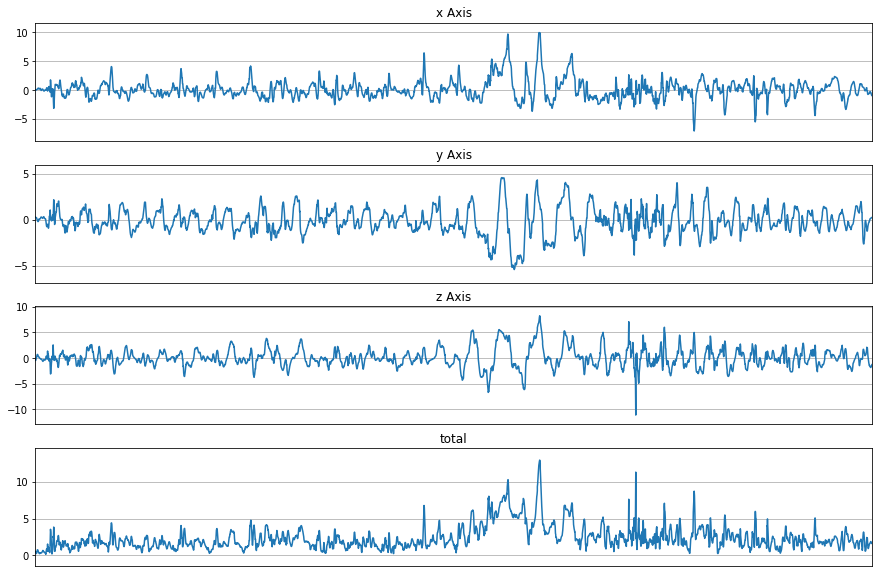

In [180]:
plot_activity(walk)

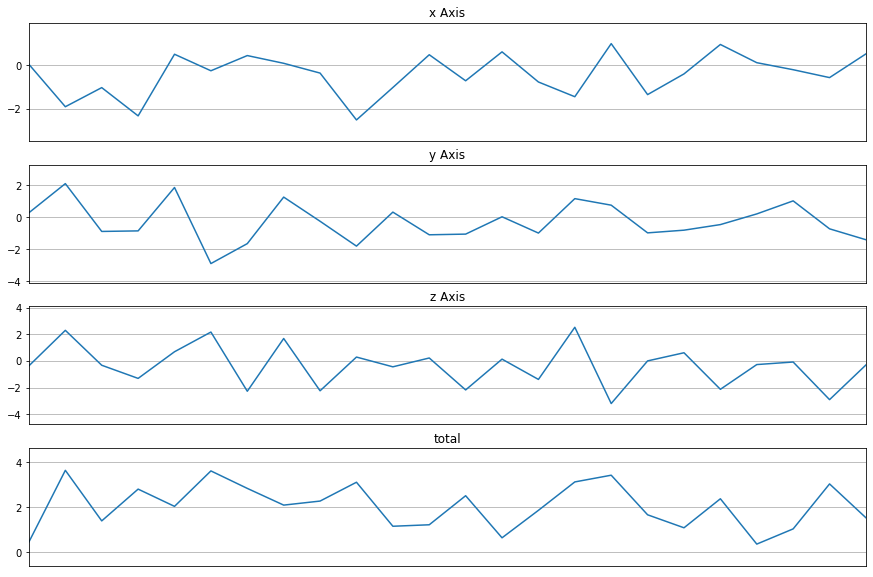

In [181]:
plot_activity(walk_train)

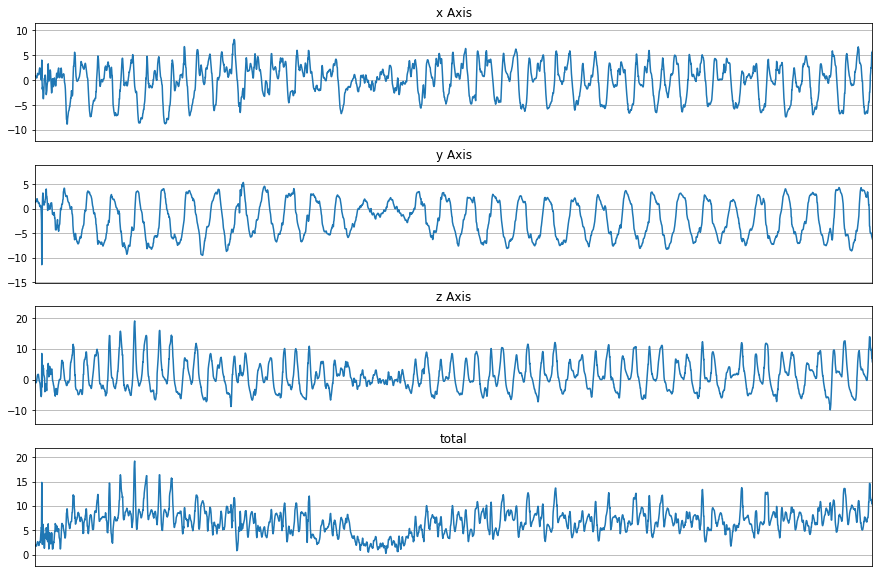

In [182]:
plot_activity(jog)

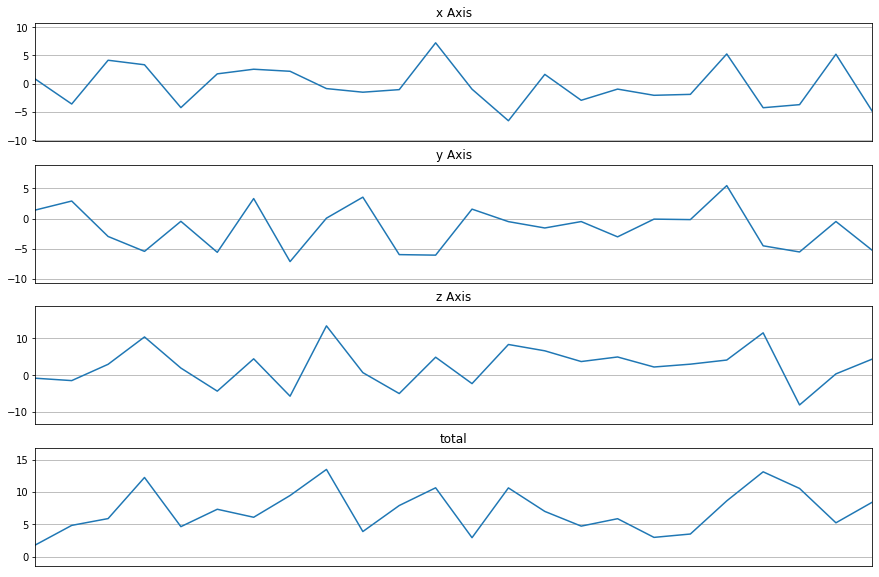

In [183]:
plot_activity(jog_train)

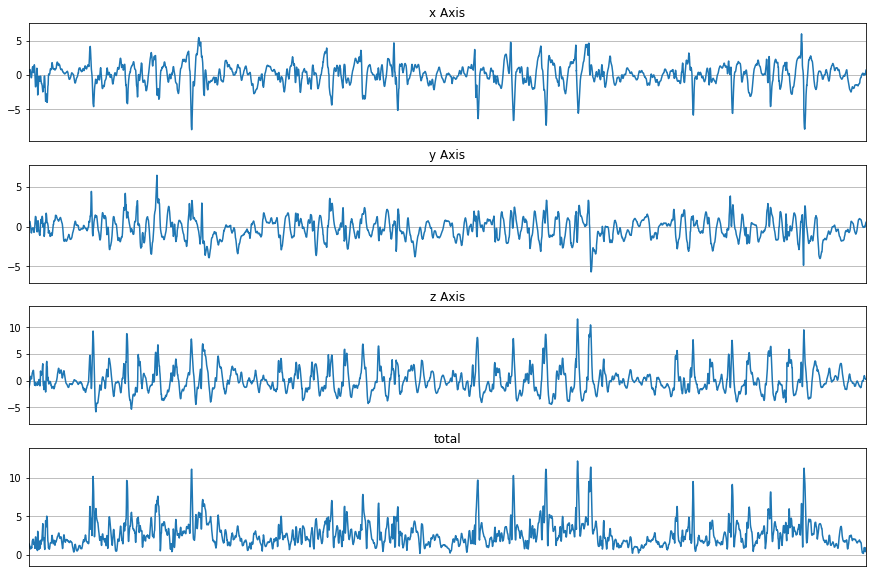

In [203]:
plot_activity(stair)

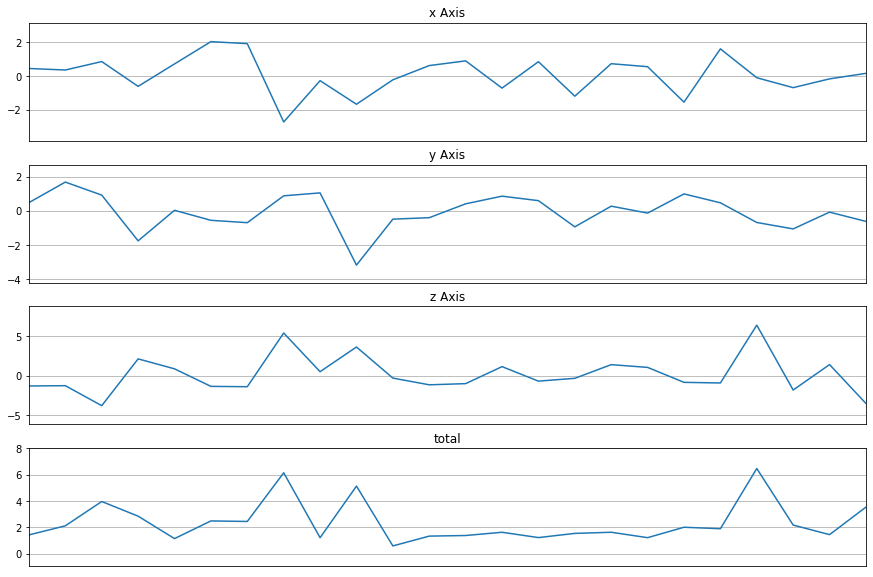

In [204]:
plot_activity(stair_train)

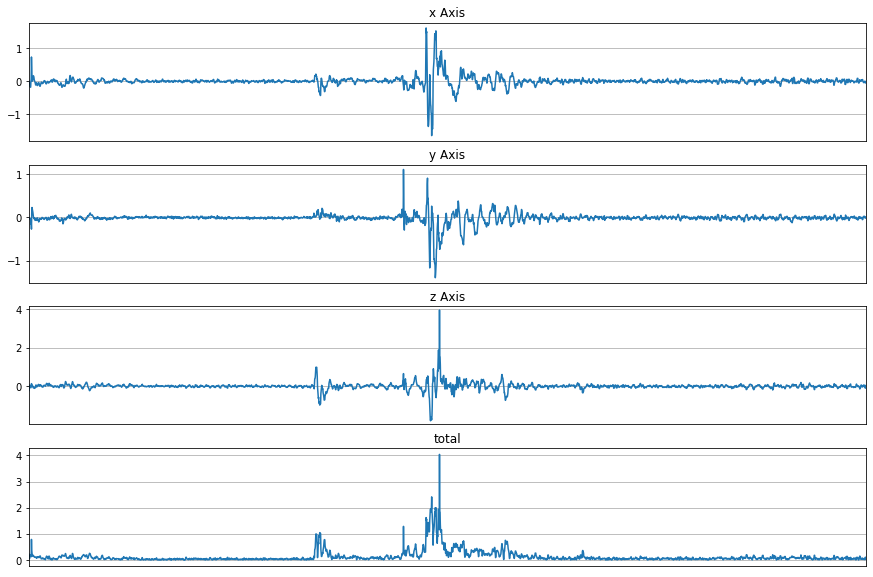

In [205]:
plot_activity(sit)

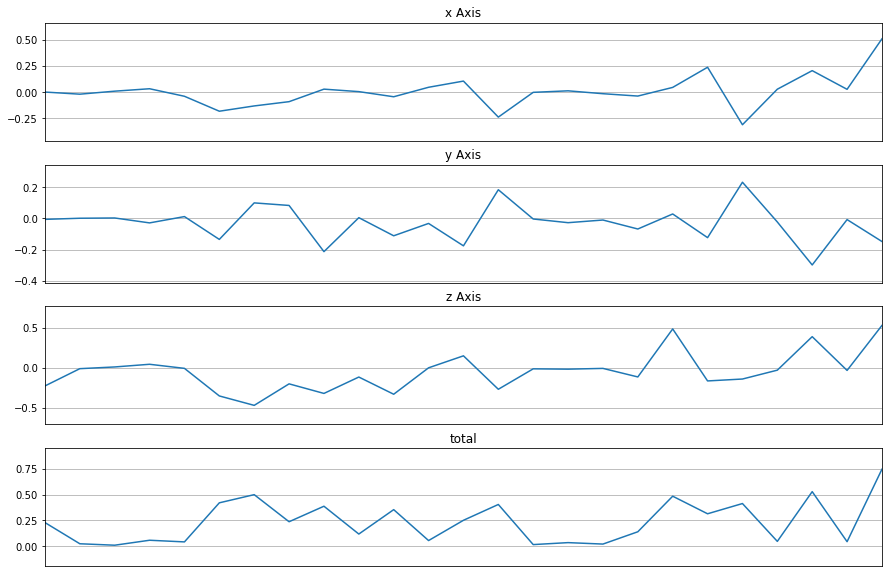

In [206]:
plot_activity(sit_train)

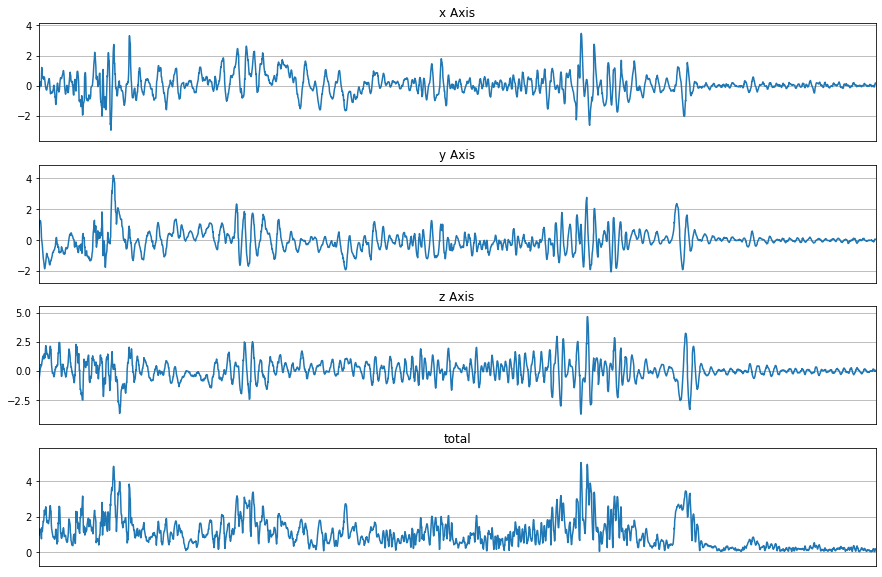

In [207]:
plot_activity(car)

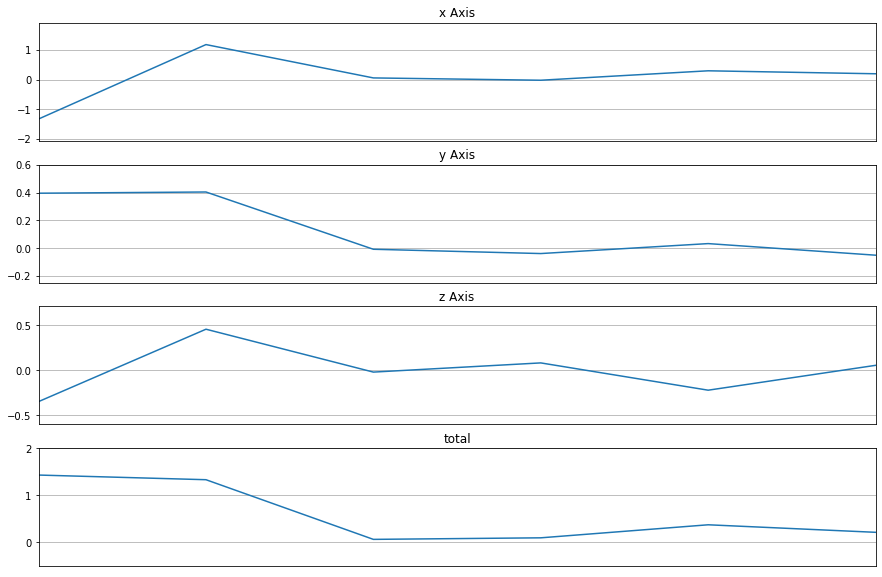

In [208]:
plot_activity(car_train)

In [184]:
import math

def magnitude(activity):
    x2 = activity['xAxis'] * activity['xAxis']
    y2 = activity['yAxis'] * activity['yAxis']
    z2 = activity['zAxis'] * activity['zAxis']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m

In [191]:
walk['magnitude'] = magnitude(walk)
jog['magnitude'] = magnitude(jog)
stair['magnitude'] = magnitude(stair)
sit['magnitude'] = magnitude(sit)
car['magnitude'] = magnitude(car)



In [192]:
walk_train['magnitude'] = magnitude(walk_train)
jog_train['magnitude'] = magnitude(jog_train)
stair_train['magnitude'] = magnitude(stair_train)
sit_train['magnitude'] = magnitude(sit_train)
car_train['magnitude'] = magnitude(car_train)

walk_test['magnitude'] = magnitude(walk_test)
jog_test['magnitude'] = magnitude(jog_test)
stair_test['magnitude'] = magnitude(stair_test)
sit_test['magnitude'] = magnitude(sit_test)
car_test['magnitude'] = magnitude(car_test)



    


In [193]:
def plot_magnitudes(activities, titles):
    fig, axs = plt.subplots(nrows=len(activities), figsize=(15, 15))
    for i in range(0, len(activities)):
        plot_axis(axs[i], activities[i]['timestamp'], activities[i]['magnitude'], titles[i])
    plt.subplots_adjust(hspace=0.2)
    plt.show()

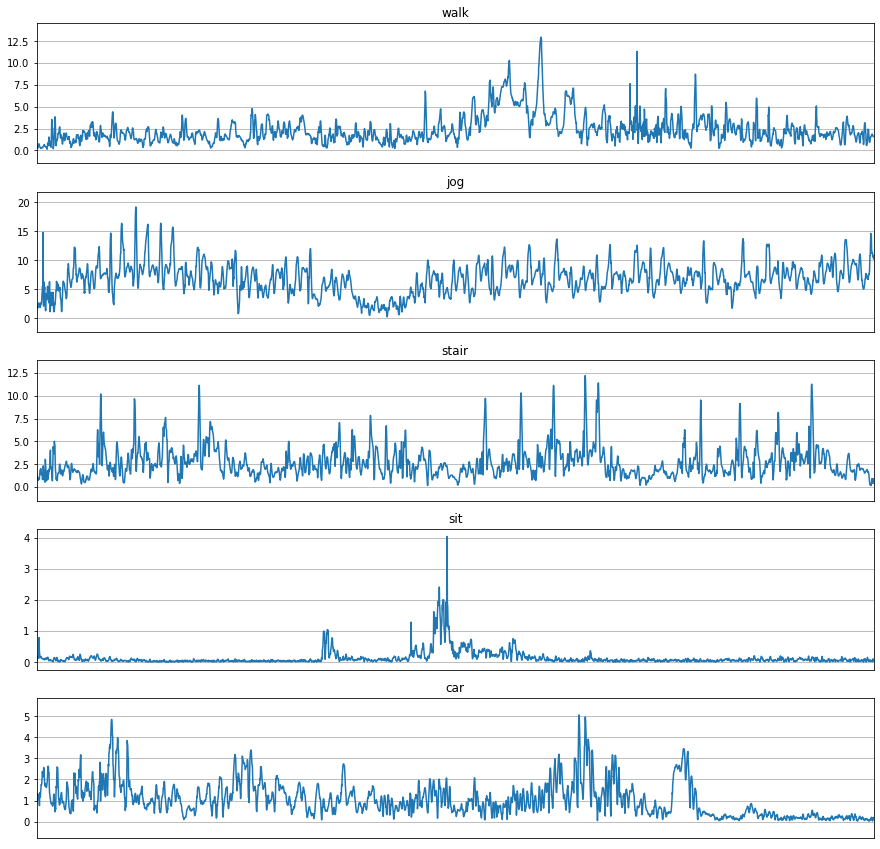

In [194]:
plot_magnitudes([walk,jog,stair,sit,car],
               ['walk','jog','stair','sit','car'])

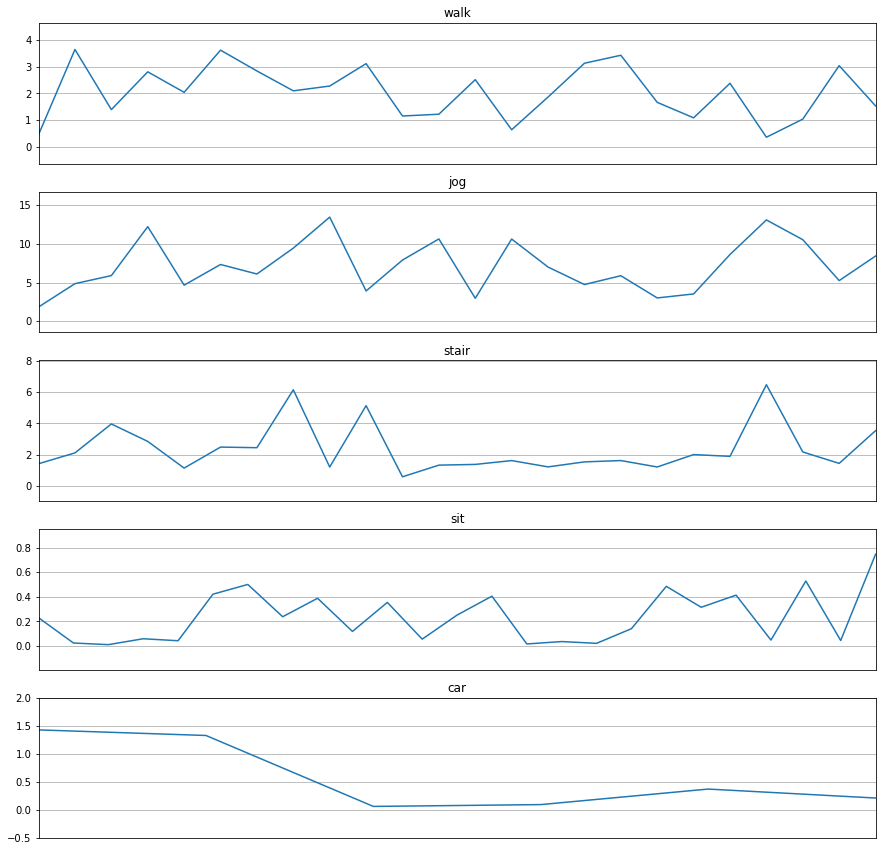

In [195]:
plot_magnitudes([walk_train,jog_train,stair_train,sit_train,car_train],
               ['walk','jog','stair','sit','car'])

In [224]:
def features(trainX):
    mi=trainX.min()
    ma=trainX.max()
    mu = trainX.mean()    
    stdv = trainX.std()
    var=trainX.var()
    skew=trainX.skew()
    kur= trainX.kurtosis()
    
    return mi, ma, mu, stdv, var, skew, kur

 


In [225]:
walk_features= features(walk_train)
jog_features= features(jog_train)
stair_features= features(stair_train)
sit_features= features(sit_train)
car_features = features(car_train)

walk_test_features= features(walk_test)
jog_test_features= features(jog_test)
stair_test_features= features(stair_test)
sit_test_features= features(sit_test)
car_test_features = features(car_test)



Learning

In [217]:
dataset = np.loadtxt('C:\My Classes\PI\A3\data_train.csv', delimiter=",")
X = dataset[:, 1:]
y = dataset[:, 0]

test= np.loadtxt('C:\My Classes\PI\A3\data_test.csv', delimiter=",")
X_test=test[:, 1:]
y_test=test[:,0]


In [222]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

results = []
results_svm =[]

results_reg =[]


clf = tree.DecisionTreeClassifier()

clf_svm =svm.SVC(kernel='linear')

regr = svm.SVR()

for i in range(0, 40):
   
    clf.fit(X, y)
    clf_svm.fit(X,y)
    clf_reg= regr.fit(X,y)
    
    res = clf.score(X_test, y_test)
    
    res_svm= clf_svm.score(X_test, y_test)
    
    res_reg= clf_reg.score(X_test, y_test)
    
    results.append(res)
    results_svm.append(res_svm)
    results_reg.append(res_reg)


print ('DecisionTree', np.mean(results), np.std(results))
print ('SVM', np.mean(results_svm), np.std(results_svm))
print ('Regression', np.mean(results_reg), np.std(results_reg))


DecisionTree 0.42833333333333334 0.041866188956934905
SVM 0.4333333333333334 5.551115123125783e-17
Regression 0.12592861231688757 0.0


[Text(198.78750000000002, 205.35999999999999, 'X[4] <= 1.163\ngini = 0.8\nsamples = 35\nvalue = [7, 7, 7, 7, 7]'),
 Text(111.60000000000001, 181.2, 'X[0] <= -0.327\ngini = 0.728\nsamples = 18\nvalue = [5, 2, 1, 7, 3]'),
 Text(55.800000000000004, 157.04, 'X[2] <= -3.302\ngini = 0.667\nsamples = 6\nvalue = [3, 1, 1, 0, 1]'),
 Text(27.900000000000002, 132.88, 'X[2] <= -3.585\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 1]'),
 Text(13.950000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(41.85, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(83.7, 132.88, 'X[3] <= -0.447\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0, 0, 0]'),
 Text(69.75, 108.72, 'X[1] <= -0.606\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0, 0, 0]'),
 Text(55.800000000000004, 84.56, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(83.7, 84.56, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0]'),
 Text(97.65, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]')

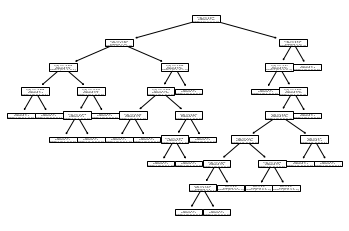

In [122]:
tree.plot_tree(clf)

In [137]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
n_components=5

pca_featurize = PCA(n_components=n_components, svd_solver='randomized',whiten=True).fit(X)

train_x_pca=pca_featurize.transform(X)
test_x_pca=pca_featurize.transform(X_test)

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf.predict(test_x_pca)))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.25      0.29      0.27         7
         3.0       0.00      0.00      0.00         7
         4.0       0.18      0.29      0.22         7
         5.0       0.00      0.00      0.00         7

    accuracy                           0.11        35
   macro avg       0.09      0.11      0.10        35
weighted avg       0.09      0.11      0.10        35



In [138]:
print(classification_report(y_test,clf_svm.predict(test_x_pca)))

              precision    recall  f1-score   support

         1.0       0.25      0.14      0.18         7
         2.0       0.00      0.00      0.00         7
         3.0       0.00      0.00      0.00         7
         4.0       0.19      0.71      0.30         7
         5.0       0.00      0.00      0.00         7

    accuracy                           0.17        35
   macro avg       0.09      0.17      0.10        35
weighted avg       0.09      0.17      0.10        35



In [220]:
dataset = np.loadtxt('C:\My Classes\PI\A3\data_train_new.csv', delimiter=",")
X = dataset[:, 1:]
y = dataset[:, 0]

test= np.loadtxt('C:\My Classes\PI\A3\data_test_new.csv', delimiter=",")
X_test=test[:, 1:]
y_test=test[:,0]

results = []
results_svm =[]

results_reg =[]


clf = tree.DecisionTreeClassifier()

clf_svm =svm.SVC(kernel='linear')

regr = svm.SVR()

for i in range(0, 30):
   
    clf.fit(X, y)
    clf_svm.fit(X,y)
    clf_reg= regr.fit(X,y)
    
    res = clf.score(X_test, y_test)
    
    res_svm= clf_svm.score(X_test, y_test)
    
    res_reg= clf_reg.score(X_test, y_test)
    
    results.append(res)
    results_svm.append(res_svm)
    results_reg.append(res_reg)


print ('DecisionTree', np.mean(results), np.std(results))
print ('SVM', np.mean(results_svm), np.std(results_svm))
print ('Regression', np.mean(results_reg), np.std(results_reg))


DecisionTree 0.4277777777777778 0.03857012212824397
SVM 0.4333333333333334 5.551115123125783e-17
Regression 0.12592861231688754 2.7755575615628914e-17
